# Sentiment Analysis on Customer Reviews using TF-IDF and Logistic Regression

This notebook performs sentiment analysis on a dataset of customer reviews. We use TF-IDF for feature extraction and Logistic Regression for classification.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
df = pd.read_csv('reviews.csv')  # Columns: 'review', 'sentiment'
df.head()

,review,sentiment
0,I love this product! It's amazing.,positive
1,Worst purchase I have ever made.,negative
2,"Pretty good, could be better.",positive
3,I’m not happy with the quality.,negative
4,"Excellent, works as expected.",positive


In [28]:
print("Dataset Shape:", df.shape)
print("\nSentiment Counts:")
print(df['sentiment'].value_counts())

Dataset Shape: (10, 2)

Sentiment Counts:
sentiment
positive    5
negative    5
Name: count, dtype: int64


In [29]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,cleaned_review
0,I love this product! It's amazing.,positive,i love this product its amazing
1,Worst purchase I have ever made.,negative,worst purchase i have ever made
2,"Pretty good, could be better.",positive,pretty good could be better
3,I’m not happy with the quality.,negative,im not happy with the quality
4,"Excellent, works as expected.",positive,excellent works as expected


In [30]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [31]:
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [33]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

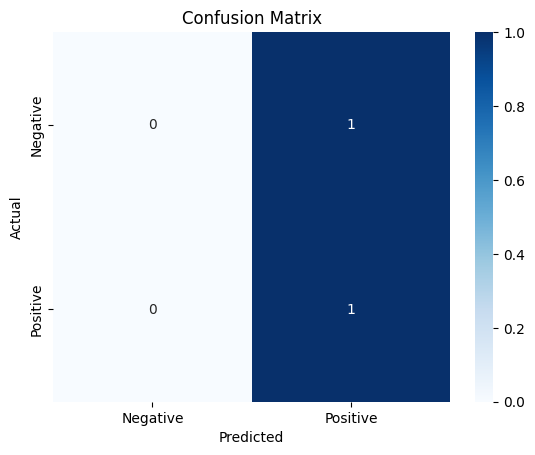

In [34]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
sample_reviews = [
    "I loved the product, very good quality!",
    "Terrible experience. Will not buy again.",
    "It's okay, not great but not bad either."
]

sample_cleaned = [clean_text(r) for r in sample_reviews]
sample_vect = vectorizer.transform(sample_cleaned)
sample_preds = model.predict(sample_vect)

for review, label in zip(sample_reviews, sample_preds):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Review: \"{review}\" → Sentiment: {sentiment}")

Review: "I loved the product, very good quality!" → Sentiment: Negative
Review: "Terrible experience. Will not buy again." → Sentiment: Negative
Review: "It's okay, not great but not bad either." → Sentiment: Negative
